In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset excel file using pandas.
df= pd.read_csv('dataframe_.csv')
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [4]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 1697
No. of Columns : 2


,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


# Observation:

* This dataset contain 1 rows and 2 columns ( Input and Output ).
* We have Minimum  feature here with object datatypes which actually have to be integer type.
* Our target feature is Output.

# Checking For Null Or Blank Values present in the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [6]:
df.nunique()

input     991
output    969
dtype: int64

DataSet Contains Duplicates and null values

In [7]:
# This will check the duplicate data for all columns.

df.duplicated().sum()

606

In [10]:
#Checking null values in the dataset

df.isnull().sum()

input     1
output    1
dtype: int64

In [11]:
# Dropping the null values

df=df.dropna()

In [12]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 39.8 KB


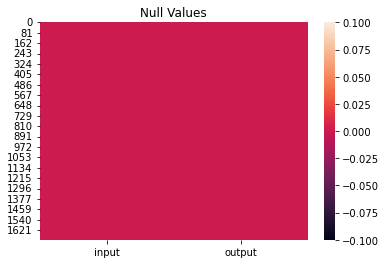

In [14]:
# Checking the presence of NULL BLANK or EMPTY VALUES through HeatMap

import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

# Checking Data To Remove Skewness

In [19]:
df.iloc[:,:-1].skew()

input   -0.203185
dtype: float64

In [20]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df.iloc[:,:-1],method='yeo-johnson')

df.iloc[:,:-1]=pd.DataFrame(x_new,columns=df.iloc[:,:-1].columns)

In [21]:
df.iloc[:,:-1].skew()

input   -0.01183
dtype: float64

# Outliers Checking

In [22]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(1696, 2)

In [23]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 39.8 KB


# Feature Engineering ( Variantion Inflation Factor )

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
df.corr()

,input,output
input,1.000000,0.551449
output,0.551449,1.000000


(array([0.5, 1.5]), [Text(0, 0.5, 'input'), Text(0, 1.5, 'output')])

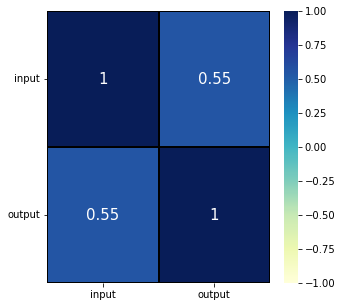

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [31]:
x=df.drop('output',axis=1)
y=df['output']

In [32]:
x

,input
0,-1.479033
1,-1.466077
2,-1.609256
3,-1.456158
4,-1.555596
...,...
1692,0.230908
1693,0.289604
1694,0.319523
1695,0.283250


In [33]:
y

0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1692    -76.380902
1693    -82.796934
1694    -87.000000
1695   -104.943052
1696   -101.726894
Name: output, Length: 1696, dtype: float64

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
  vif=pd.DataFrame()
  vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif["features"]=x.columns
  print(vif)

# Scaling the Data

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,input
0,-1.479033
1,-1.466077
2,-1.609256
3,-1.456158
4,-1.555596
...,...
1691,0.230908
1692,0.289604
1693,0.319523
1694,0.283250


# Machine Learning Model Building

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y, random_state=99, test_size=0.3)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (1187, 2)
Training Target Vector Size : (1187,)
Test Feature Matrix Size: (509, 2)
Test Target Vector Size: (509,)


# Random Forest Regressor

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y, random_state= 508, test_size=0.25)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 0.08794354143832814
Mean squared error : 0.02081136959830448
Root Mean squared error : 0.14426146262361433
R2 Score of Random Forest Regressor :
99.99952693359268


In [45]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, df, y, cv=6)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.9999759179080328
Difference in R2 & CV Score: 0.001935142789406541


# Decision Tree Regressor

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y, random_state= 508, test_size=0.25)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 0.07653258825943399
Mean squared error : 0.033854071862339526
Root Mean squared error : 0.18399476042088678
R2 Score of Decision Tree Regressor :
99.99923045794398


In [52]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, df, y, cv=6)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.9999581215298209
Difference in R2 & CV Score: 0.0034183049618974337


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y, random_state= 508, test_size=0.25)
etc = ExtraTreesRegressor()
etc.fit(X_train, Y_train)
y_pred = etc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 0.0306467463223653
Mean squared error : 0.006670505693046875
Root Mean squared error : 0.08167316384864048
R2 Score of Extra Tree Regressor :
99.99984837172065


In [55]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, df, y, cv=6)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.9954188522920239
Difference in R2 & CV Score: 0.45796314251825265


# Random Forest Regressor

In [66]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)

# prediction
predrf=rf.predict(X_test)
print('R2_score:',(r2_score(Y_test,predrf))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(Y_test, predrf))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(Y_test, predrf))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predrf)))

R2_score: 99.99952787509422
MAE: 0.08822318483266538
MSE: 0.02076995060000732
RMSE: 0.14411783581502785


# Hyper Parameter Tuning : GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV

In [68]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [69]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [71]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [72]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [73]:
P = RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto', n_estimators=200)
P.fit(X_train, Y_train)
pred = P.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(Y_test, predrf)))

R2_Score: 99.99433310991536
RMSE value: 0.14411783581502785


# Saving the model

In [74]:
import joblib
joblib.dump(P,"Innomatics.pkl")

['Innomatics.pkl']